In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#here we load library 

In [5]:
data=pd.read_csv("ec2_disk_write_bytes_c0d644.csv")

In [6]:
data

,timestamp,value
0,2014-04-02 14:25:00,0.0
1,2014-04-02 14:30:00,0.0
2,2014-04-02 14:35:00,0.0
3,2014-04-02 14:40:00,0.0
4,2014-04-02 14:45:00,0.0
...,...,...
4027,2014-04-16 14:00:00,0.0
4028,2014-04-16 14:05:00,0.0
4029,2014-04-16 14:10:00,0.0
4030,2014-04-16 14:15:00,0.0


# Basic check

In [5]:
data.head()#first five rows

,timestamp,value
0,2014-04-02 14:25:00,0.0
1,2014-04-02 14:30:00,0.0
2,2014-04-02 14:35:00,0.0
3,2014-04-02 14:40:00,0.0
4,2014-04-02 14:45:00,0.0


In [6]:
data.tail() #last five rows

,timestamp,value
4027,2014-04-16 14:00:00,0.0
4028,2014-04-16 14:05:00,0.0
4029,2014-04-16 14:10:00,0.0
4030,2014-04-16 14:15:00,0.0
4031,2014-04-16 14:20:00,0.0


In [7]:
data.info() #infomation of data its object or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [8]:
data.describe()
#here we get min ,max ,mean value

,value
count,4.032000e+03
mean,1.733127e+07
std,7.969664e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,8.639640e+08


In [9]:
data.isnull().sum()
#no data is null

timestamp    0
value        0
dtype: int64

# Basic checks

In [10]:
data.head()#first five rows

,timestamp,value
0,2014-04-02 14:25:00,0.0
1,2014-04-02 14:30:00,0.0
2,2014-04-02 14:35:00,0.0
3,2014-04-02 14:40:00,0.0
4,2014-04-02 14:45:00,0.0


In [11]:
data=pd.read_csv('ec2_disk_write_bytes_c0d644.csv',parse_dates=[0],index_col='timestamp')

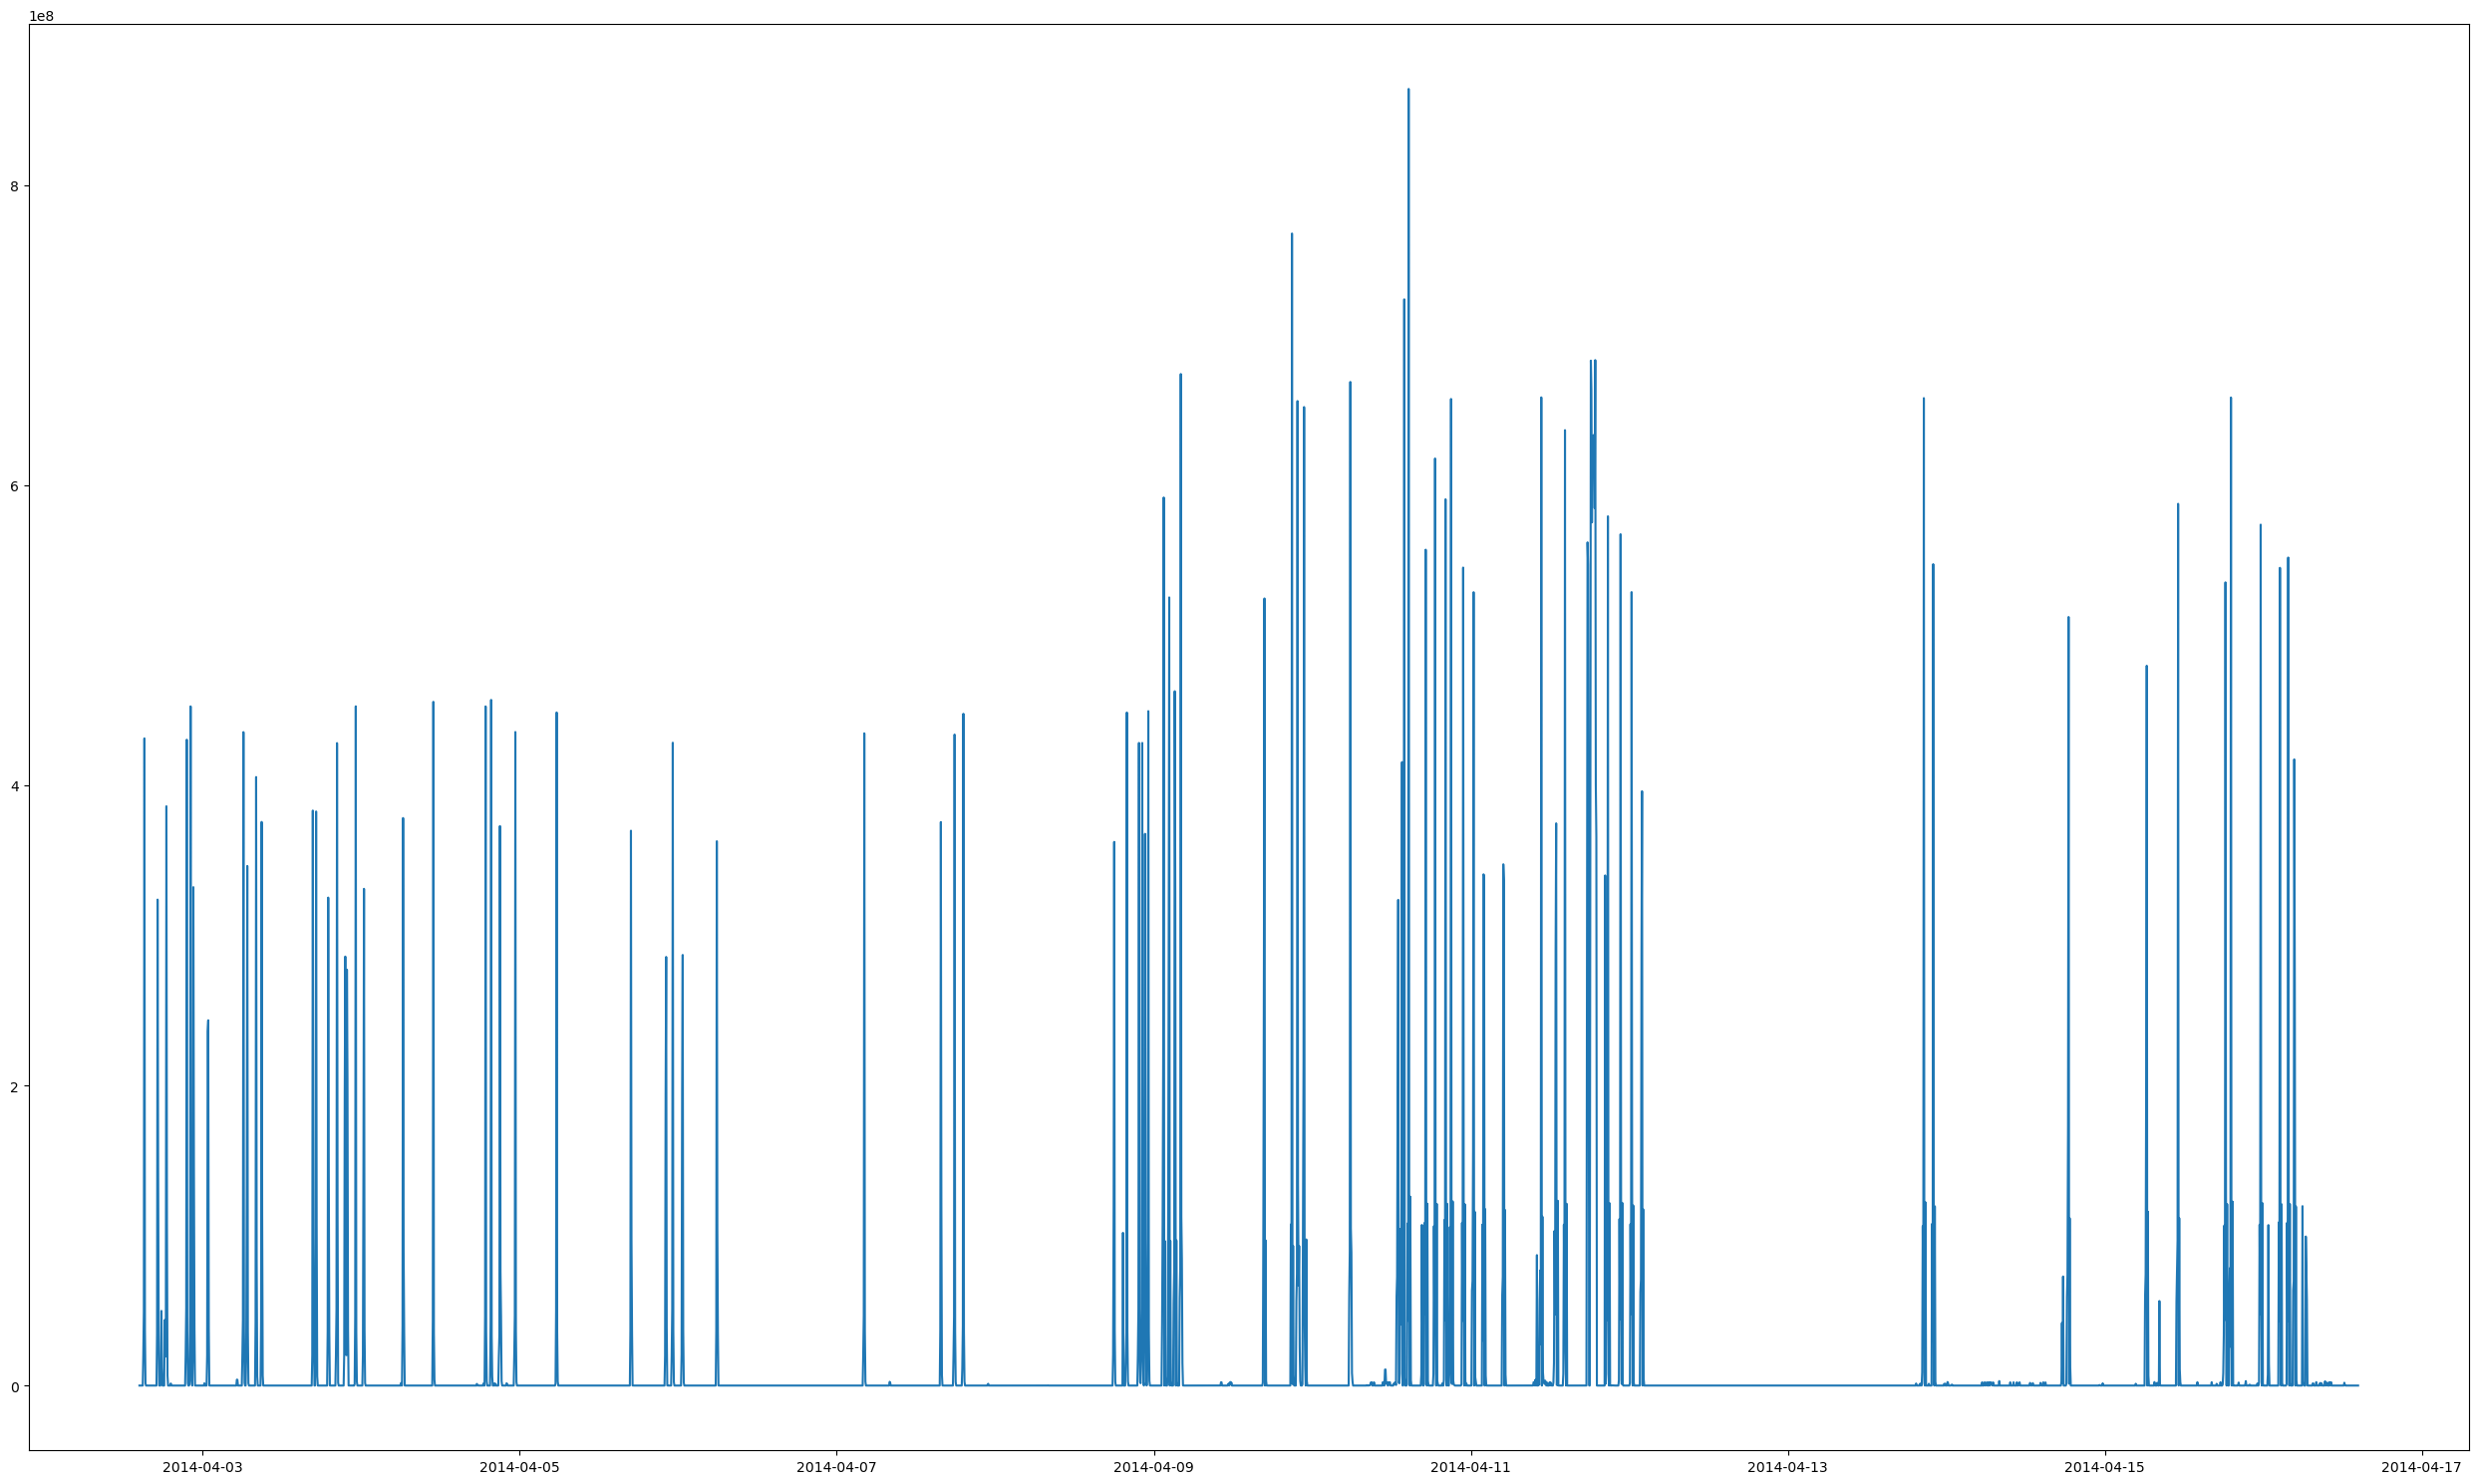

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

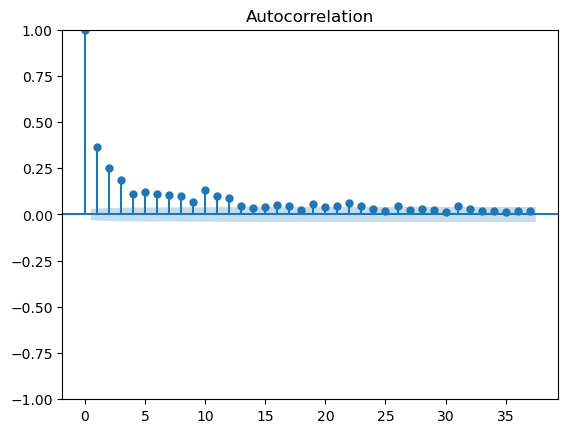

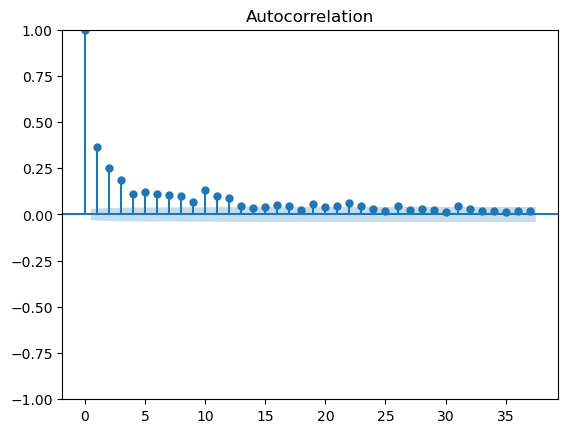

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

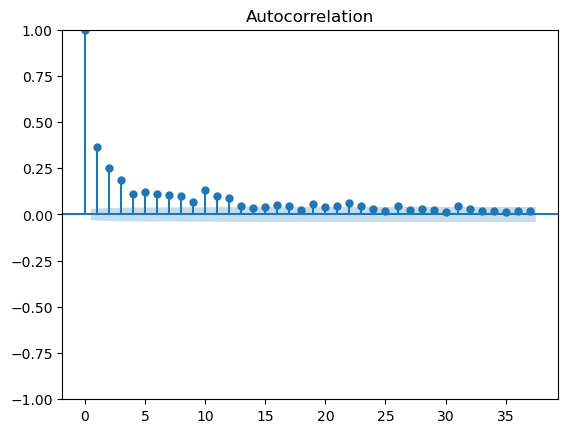

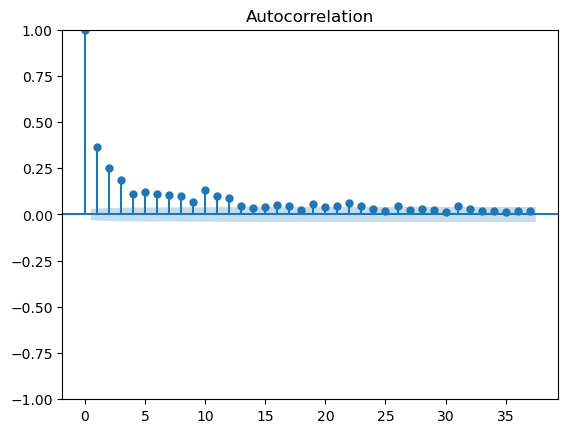

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [15]:
#We can perform the ADfuller test, a test based on hypothesis, where if the p-value is
#less than 0.05, then we can consider the time series is stationary, and if the P-value is
#greater than 0.05, then the time series is non-stationary.

In [16]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -11.280685787930038
2. P-Value :  1.458782797318339e-20
3. Num Of Lags :  18
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4013
5. Critical Values :
	 1% :  -3.431980572598556
	 5% :  -2.8622604977715755
	 10% :  -2.5671535285260605


In [17]:
#P-value is higher for our dataset, and we can say that the evidence of rejecting the null
#hypothesis is low; hence the time series is non-stationary.

In [18]:
data

,value
timestamp,
2014-04-02 14:25:00,0.0
2014-04-02 14:30:00,0.0
2014-04-02 14:35:00,0.0
2014-04-02 14:40:00,0.0
2014-04-02 14:45:00,0.0
...,...
2014-04-16 14:00:00,0.0
2014-04-16 14:05:00,0.0
2014-04-16 14:10:00,0.0


In [19]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [20]:
data1

,value
timestamp,
2014-04-02 14:25:00,NaN
2014-04-02 14:30:00,0.0
2014-04-02 14:35:00,0.0
2014-04-02 14:40:00,0.0
2014-04-02 14:45:00,0.0
...,...
2014-04-16 14:00:00,0.0
2014-04-16 14:05:00,0.0
2014-04-16 14:10:00,0.0


In [21]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-04-02 14:30:00,0.0
2014-04-02 14:35:00,0.0
2014-04-02 14:40:00,0.0
2014-04-02 14:45:00,0.0
2014-04-02 14:50:00,0.0
...,...
2014-04-16 14:00:00,0.0
2014-04-16 14:05:00,0.0
2014-04-16 14:10:00,0.0


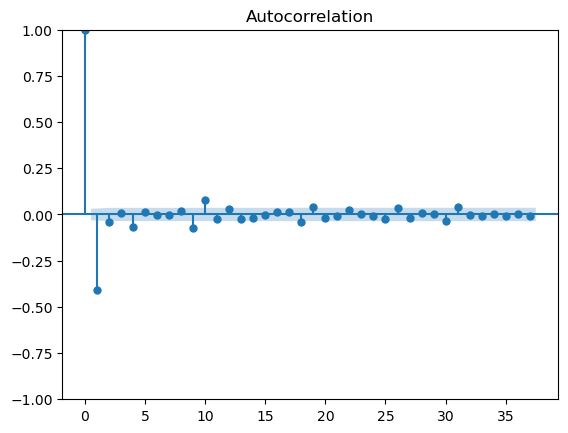

In [22]:
plot_acf(data1); # autocorrelation plot 

In [23]:
data2=data1.diff(periods=1) # differencing applied to data1

In [24]:
data2=data2.iloc[1:] # integrated to the order of 2

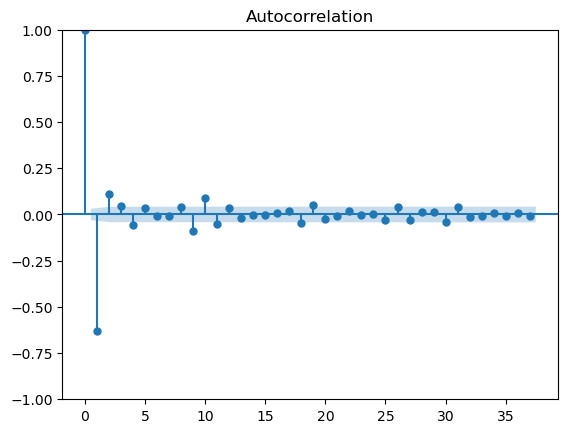

In [25]:
plot_acf(data2);

In [26]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [27]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3930 entries, 2014-04-02 22:55:00 to 2014-04-16 14:20:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3930 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


In [28]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [29]:

#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [30]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 5, 6, 11]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [31]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

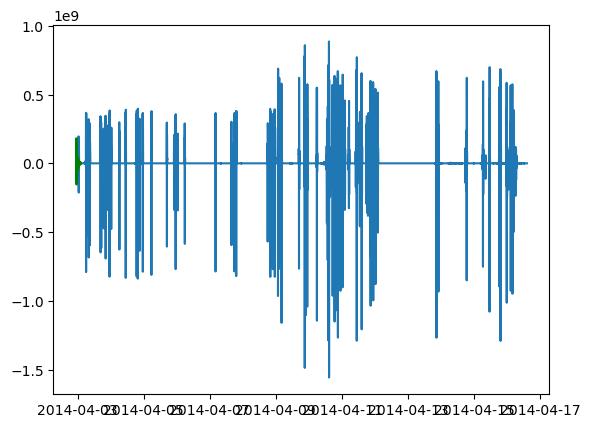

In [32]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [33]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [34]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training


In [35]:
## evaluate the model
print(model_arima_fit.aic)

4114.633774824506


In [36]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=1,end=142)

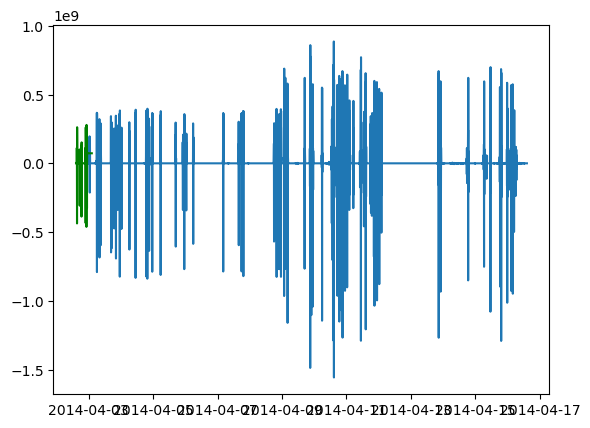

In [37]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [38]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [39]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) 4468.91247773611
(0, 0, 1) 4020.197630266577
(0, 0, 2) 3996.171609150135
(0, 0, 3) 3990.747979195207
(0, 0, 4) 3990.4296522359873
(0, 1, 0) 4179.505783038482
(0, 1, 1) 4074.8813239302463
(0, 1, 2) 4019.169908812393
(0, 1, 3) 4009.779032925859
(0, 1, 4) 3981.9331123985853
(0, 2, 0) 4258.293362688776
(0, 2, 1) 4150.244642416105
(0, 2, 2) 4084.982589834198
(0, 2, 3) 4057.9622480235944
(0, 2, 4) 4019.124793234708
(0, 3, 0) 4338.013135412542
(0, 3, 1) 4233.466266392559
(0, 3, 2) 4166.468221670989
(0, 3, 3) 4109.175901071488
(0, 3, 4) 4072.9276752931783
(0, 4, 0) 4416.5545588932255
(0, 4, 1) 4318.378089920343
(0, 4, 2) 4262.961991615758
(0, 4, 3) 4172.895801736007
(0, 4, 4) 4135.84298103199
(1, 0, 0) 4067.9569391706536
(1, 0, 1) 4013.791819462882
(1, 0, 2) 4020.840580792187
(1, 0, 3) 3986.6512330384935
(1, 0, 4) 3988.324640239473
(1, 1, 0) 4114.633774824506
(1, 1, 1) 4040.1888412403223
(1, 1, 2) 3997.866914082836
(1, 1, 3) 3995.688552114935
(1, 1, 4) 3967.9896979697814
(1, 2, 0) 41

LinAlgError: LU decomposition error.

In [40]:
min(list2)  # lowest aic score

3967.760428958381

In [41]:
loc=list2.index(min(list2))
loc

59

In [42]:
# pdq corresponding to lowest aic
list1[loc]

(2, 1, 4)

In [43]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [44]:
print(model_arima_fit.aic) # confirm aic score

3989.708933757175


In [45]:
forecast = model_arima_fit.forecast(steps=9)
forecast

2014-04-02 22:55:00    1.254570e+08
2014-04-02 23:00:00   -5.052927e+07
2014-04-02 23:05:00   -3.549044e+07
2014-04-02 23:10:00   -8.313066e+06
2014-04-02 23:15:00   -7.557433e+06
2014-04-02 23:20:00    1.022804e+07
2014-04-02 23:25:00   -4.052498e+06
2014-04-02 23:30:00    5.100765e+06
2014-04-02 23:35:00   -4.734584e+06
Freq: 5T, Name: predicted_mean, dtype: float64

In [46]:
prediction=model_arima_fit.predict(start=1,end=142)

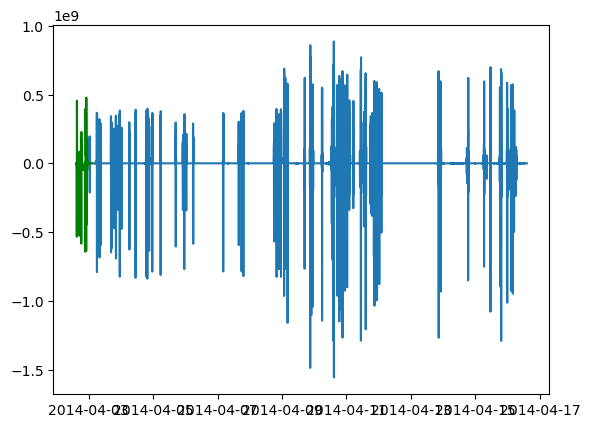

In [47]:
plt.plot(test)
plt.plot(prediction,color='green')

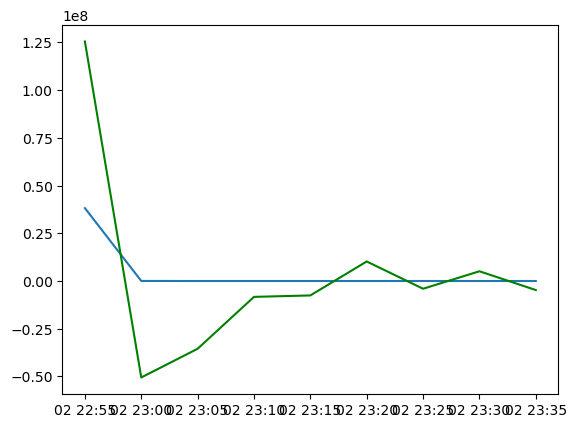

In [48]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [49]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ 3.8181256e+07,  2.8672000e+04,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        1.5433700e+06, -3.0867400e+06,  1.5433700e+06,  0.0000000e+00,
        0.0000000e+00,  2.0086000e+07,  1.9588000e+08, -2.0863000e+08,
       -2.1246900e+08])

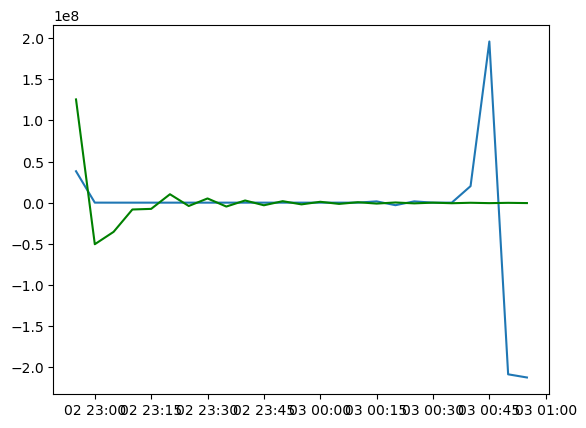

In [50]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [ ]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

In [52]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

74605201.58379887


5565936103359265.0

# Conclusion